In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [2]:
crop_data=pd.read_csv('Crop_recommendation.csv')
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,4,46,15,31.012749,62.403925,3.504752,63.771924,mothbeans
1,36,43,24,27.094006,43.653054,3.510404,41.537495,mothbeans
2,19,51,25,26.804744,48.239914,3.525366,43.878020,mothbeans
3,16,51,21,31.019636,49.976752,3.532009,32.812965,mothbeans
4,35,51,17,28.799292,49.842134,3.558823,40.855347,mothbeans


<AxesSubplot:xlabel='N', ylabel='count'>

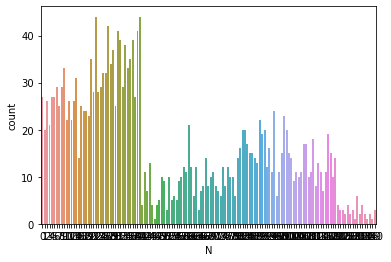

In [3]:
sns.countplot(x='N',data=crop_data)

<AxesSubplot:xlabel='temperature', ylabel='count'>

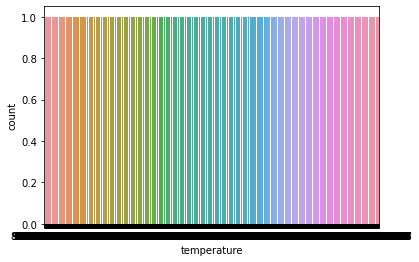

In [4]:
sns.countplot(x='temperature',data=crop_data)

<AxesSubplot:ylabel='Frequency'>

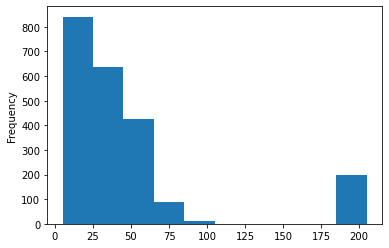

In [5]:
crop_data["K"].plot.hist()

In [6]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,4,46,15,31.012749,62.403925,3.504752,63.771924,mothbeans
1,36,43,24,27.094006,43.653054,3.510404,41.537495,mothbeans
2,19,51,25,26.804744,48.239914,3.525366,43.878020,mothbeans
3,16,51,21,31.019636,49.976752,3.532009,32.812965,mothbeans
4,35,51,17,28.799292,49.842134,3.558823,40.855347,mothbeans


In [7]:
order_of_crops=crop_data['label']
print(order_of_crops)
for i in range(len(order_of_crops)):
    if (order_of_crops[i]=='apple'):
        order_of_crops[i]=1
    elif (order_of_crops[i]=='banana'):
        order_of_crops[i]=2
    elif (order_of_crops[i]=='blackgram'):
        order_of_crops[i]=3
    elif (order_of_crops[i]=='mango'):
        order_of_crops[i]=4
    elif (order_of_crops[i]=='mothbeans'):
        order_of_crops[i]=5
    elif (order_of_crops[i]=='mungbean'):
        order_of_crops[i]=6
    elif (order_of_crops[i]=='muskmelon'):
        order_of_crops[i]=7
    elif (order_of_crops[i]=='orange'):
        order_of_crops[i]=8
    elif (order_of_crops[i]=='papaya'):
        order_of_crops[i]=9
    elif (order_of_crops[i]=='pigeonpeas'):
        order_of_crops[i]=10
    elif (order_of_crops[i]=='pomegranate'):
        order_of_crops[i]=11
    elif (order_of_crops[i]=='rice'):
        order_of_crops[i]=12
    elif (order_of_crops[i]=='watermelon'):
        order_of_crops[i]=13
    elif (order_of_crops[i]=='chickpea'):
        order_of_crops[i]=14
    elif (order_of_crops[i]=='coconut'):
        order_of_crops[i]=15
    elif (order_of_crops[i]=='coffee'):
        order_of_crops[i]=16
    elif (order_of_crops[i]=='cotton'):
        order_of_crops[i]=17
    elif (order_of_crops[i]=='grapes'):
        order_of_crops[i]=18
    elif (order_of_crops[i]=='jute'):
        order_of_crops[i]=19
    elif (order_of_crops[i]=='kidneybeans'):
        order_of_crops[i]=20
    elif (order_of_crops[i]=='lentil'):
        order_of_crops[i]=21
    elif (order_of_crops[i]=='maize'):
        order_of_crops[i]=22

0       mothbeans
1       mothbeans
2       mothbeans
3       mothbeans
4       mothbeans
          ...    
2195    mothbeans
2196    mothbeans
2197    mothbeans
2198    mothbeans
2199    mothbeans
Name: label, Length: 2200, dtype: object


C:\Users\acer\AppData\Local\Temp/ipykernel_17700/4211600110.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_of_crops[i]=5
C:\Users\acer\AppData\Local\Temp/ipykernel_17700/4211600110.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_of_crops[i]=4
C:\Users\acer\AppData\Local\Temp/ipykernel_17700/4211600110.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_of_crops[i]=10
C:\Users\acer\AppData\Local\Temp/ipyker

In [8]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,4,46,15,31.012749,62.403925,3.504752,63.771924,5
1,36,43,24,27.094006,43.653054,3.510404,41.537495,5
2,19,51,25,26.804744,48.239914,3.525366,43.878020,5
3,16,51,21,31.019636,49.976752,3.532009,32.812965,5
4,35,51,17,28.799292,49.842134,3.558823,40.855347,5


In [9]:
crop_data.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [10]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
crop_data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,4,46,15,31.012749,62.403925,3.504752,63.771924,5
1,36,43,24,27.094006,43.653054,3.510404,41.537495,5
2,19,51,25,26.804744,48.239914,3.525366,43.878020,5
3,16,51,21,31.019636,49.976752,3.532009,32.812965,5
4,35,51,17,28.799292,49.842134,3.558823,40.855347,5
5,3,49,18,27.910952,64.709306,3.692864,32.678919,5
6,22,49,22,28.234947,61.562052,3.711059,72.666664,5
7,17,57,20,28.506779,45.200945,3.793575,66.176146,5
8,8,60,18,31.216300,46.018682,3.808429,53.120528,5
9,11,45,19,28.700121,44.359648,3.828031,44.116221,5


In [12]:
crop_data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,4,46,15,31.012749,62.403925,3.504752,63.771924,5
1,36,43,24,27.094006,43.653054,3.510404,41.537495,5
2,19,51,25,26.804744,48.239914,3.525366,43.878020,5
3,16,51,21,31.019636,49.976752,3.532009,32.812965,5
4,35,51,17,28.799292,49.842134,3.558823,40.855347,5
5,3,49,18,27.910952,64.709306,3.692864,32.678919,5
6,22,49,22,28.234947,61.562052,3.711059,72.666664,5
7,17,57,20,28.506779,45.200945,3.793575,66.176146,5
8,8,60,18,31.216300,46.018682,3.808429,53.120528,5
9,11,45,19,28.700121,44.359648,3.828031,44.116221,5


In [13]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,4,46,15,31.012749,62.403925,3.504752,63.771924,5
1,36,43,24,27.094006,43.653054,3.510404,41.537495,5
2,19,51,25,26.804744,48.239914,3.525366,43.878020,5
3,16,51,21,31.019636,49.976752,3.532009,32.812965,5
4,35,51,17,28.799292,49.842134,3.558823,40.855347,5


In [14]:
x=crop_data.drop("label",axis=1)
y=crop_data["label"]
y=y.astype('int')
y

0       5
1       5
2       5
3       5
4       5
       ..
2195    5
2196    5
2197    5
2198    5
2199    5
Name: label, Length: 2200, dtype: int32

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
y_train

824     19
1744     8
1913     3
1123     2
42       4
        ..
634     21
1470     7
1869    19
2018    21
2041     3
Name: label, Length: 1540, dtype: int32

In [16]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
predictions=model.predict(x_test)

In [18]:
predictions

array([15,  3, 12,  3, 18, 20,  9,  3, 17, 21, 13,  4,  6, 14, 12,  3,  9,
       19,  2, 11, 19,  4, 19, 12, 15, 20,  6,  9, 20, 11, 15,  3, 17, 19,
       16,  3, 17, 12,  1,  9, 19,  5,  9, 16, 15,  2,  2,  1,  6, 11,  1,
       15,  4, 20, 10, 10,  6, 20,  6, 18, 10,  5, 17,  2, 21,  9, 20, 14,
       16, 21,  6,  1, 22, 16, 14,  4,  5,  2, 16, 22, 17,  9, 10,  2, 19,
       10, 15, 10, 17, 11, 21, 21,  7, 13,  8,  7,  2, 12, 18, 17, 14, 19,
       20,  4,  3, 16,  5, 13,  2, 15,  4,  8,  3, 21, 22, 16, 10,  4,  5,
       13, 14,  9, 19, 21, 20,  1,  3,  6,  5,  1, 21,  2, 20,  3, 22,  6,
        4,  1, 21,  9,  9, 14,  1,  7, 18, 10, 18,  1, 12,  6, 12, 17, 14,
        3,  1,  5,  4,  9, 21, 20, 19, 10,  9, 13, 13,  4,  6,  1, 13,  6,
        9, 22,  5, 20, 16,  4,  4,  2,  1, 21, 15, 22,  3, 17,  7, 11,  7,
        2, 14,  8,  9, 22, 20, 21,  2, 21,  4, 14, 15, 22, 11, 17, 11, 22,
       18, 15, 11, 15,  1, 10,  9, 12, 20, 18, 10, 21,  8, 18,  5, 15, 11,
       16, 15, 14, 15,  9

In [19]:
y_test

541     15
1392     3
1973    12
2199     5
831     18
        ..
925      8
1115     4
15       5
2031    12
1960    21
Name: label, Length: 660, dtype: int32

In [20]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        34\n           2       1.00      1.00      1.00        30\n           3       0.89      0.81      0.85        31\n           4       1.00      1.00      1.00        27\n           5       0.90      0.90      0.90        30\n           6       0.96      0.96      0.96        26\n           7       1.00      1.00      1.00        33\n           8       1.00      1.00      1.00        28\n           9       1.00      0.97      0.99        35\n          10       1.00      0.97      0.98        29\n          11       0.95      1.00      0.97        35\n          12       0.96      0.89      0.93        28\n          13       1.00      1.00      1.00        29\n          14       1.00      1.00      1.00        26\n          15       0.97      0.94      0.96        36\n          16       0.97      1.00      0.98        28\n          17       0.86      0.97      0.91        31\n       

In [21]:
confusion_matrix(y_test,predictions)

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  2],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0, 27,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0, 28,  0,  0,

In [22]:
accuracy_score(y_test,predictions)

0.9621212121212122

In [23]:
predictions

array([15,  3, 12,  3, 18, 20,  9,  3, 17, 21, 13,  4,  6, 14, 12,  3,  9,
       19,  2, 11, 19,  4, 19, 12, 15, 20,  6,  9, 20, 11, 15,  3, 17, 19,
       16,  3, 17, 12,  1,  9, 19,  5,  9, 16, 15,  2,  2,  1,  6, 11,  1,
       15,  4, 20, 10, 10,  6, 20,  6, 18, 10,  5, 17,  2, 21,  9, 20, 14,
       16, 21,  6,  1, 22, 16, 14,  4,  5,  2, 16, 22, 17,  9, 10,  2, 19,
       10, 15, 10, 17, 11, 21, 21,  7, 13,  8,  7,  2, 12, 18, 17, 14, 19,
       20,  4,  3, 16,  5, 13,  2, 15,  4,  8,  3, 21, 22, 16, 10,  4,  5,
       13, 14,  9, 19, 21, 20,  1,  3,  6,  5,  1, 21,  2, 20,  3, 22,  6,
        4,  1, 21,  9,  9, 14,  1,  7, 18, 10, 18,  1, 12,  6, 12, 17, 14,
        3,  1,  5,  4,  9, 21, 20, 19, 10,  9, 13, 13,  4,  6,  1, 13,  6,
        9, 22,  5, 20, 16,  4,  4,  2,  1, 21, 15, 22,  3, 17,  7, 11,  7,
        2, 14,  8,  9, 22, 20, 21,  2, 21,  4, 14, 15, 22, 11, 17, 11, 22,
       18, 15, 11, 15,  1, 10,  9, 12, 20, 18, 10, 21,  8, 18,  5, 15, 11,
       16, 15, 14, 15,  9